In [13]:
from file import readFile
import pandas as pd
from prophet import Prophet
dailyHisata = readFile('dailies-his')
# dailyData = readFile('dailies')

In [14]:
# dailyDataset = dailyDataset.loc['2023']
# dailyDataset = dailyHisata.query('dateIndex >= 2023')
# dailyDataset
# dailyData.dailyData
# (dailyHisata)
# dailyHisata['max'] = dailyHisata['max'] * 1.2
allData = dailyHisata
# allData = dailyHisata.query('pptTotal < 1')
# allData = pd.concat([dailyData.query('dateIndex>=2023'), dailyHisata.query('dateIndex<2023')])

In [15]:
dataset = allData
dataset = allData.query('mark>0')
dataset = allData.query('max>0')
# dataset = allData.query('pptTotal<1')
dataset['max'] = dataset['max'] * 40
# dataset['max'] = dataset['mark'] / 100 * 80000
# dataset

/var/folders/7y/d40kdrfn7dvf9v9n99q6qbjh0000gn/T/ipykernel_58430/4210621670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['max'] = dataset['max'] * 40


In [16]:
dataset['dateInde'] = pd.to_datetime(dataset['date'])
dataset = dataset.set_index('dateInde', drop=True)

# badweathers = pd.DataFrame({
#   'holiday': 'badweathers',
#   'ds': pd.to_datetime(dataset.query('pptTotal>15')['date']),
#   'lower_window': -1,
#   'upper_window': 0,
# })
# dataset
# df = dataset[['date', 'max']]

# df['2019'].plot()
# df.plot()
# dataset = dataset.drop(dataset.loc['2016'].index)
# dataset = dataset.drop(dataset.loc['2017'].index)
# dataset = dataset.drop(dataset.loc['2018'].index)
# dataset = dataset.drop(dataset.loc['2019'].index)
dataset = dataset.drop(dataset.loc['2020'].index)
dataset = dataset.drop(dataset.loc['2021'].index)
dataset = dataset.drop(dataset.loc['2022'].index)
# dataset = dataset.drop(dataset.loc['2023'].index)



/var/folders/7y/d40kdrfn7dvf9v9n99q6qbjh0000gn/T/ipykernel_58430/872124303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['dateInde'] = pd.to_datetime(dataset['date'])


/var/folders/7y/d40kdrfn7dvf9v9n99q6qbjh0000gn/T/ipykernel_58430/33054068.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ydata = df.resample('Y').mean()


<AxesSubplot: title={'center': 'Shanghai Disneyland Daily Flow'}, xlabel='Date', ylabel='Flow'>

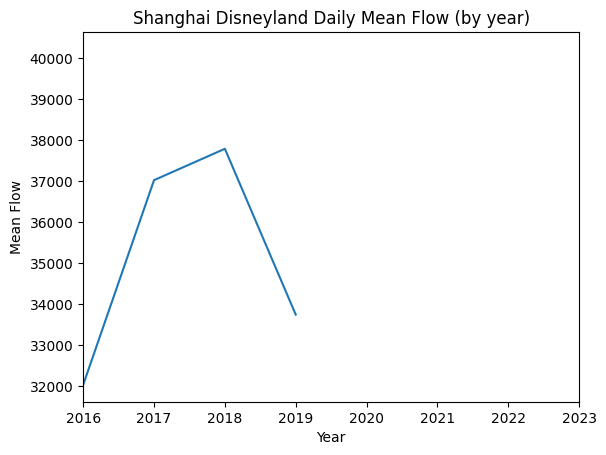

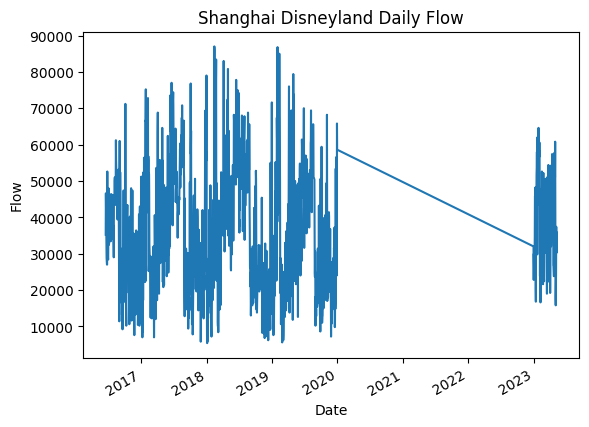

In [17]:
# df.dropna(how='any')
df = dataset[['date', 'max']]
# cf = dataset[['date', 'pptTotal']]
# df.loc['2017Q1'].plot(title='2017 Flow')
# cf.loc['2017'].plot(title='2017 Flow')
# df.loc['2018'].plot(title='2018 Flow')
# cf.loc['2018'].plot(title='2018 Flow')
# df.loc['2019'].plot(title='2019 Flow')
# df
ydata = df.resample('Y').mean()
# ydata['date'] = ydata['date']
ydata.plot(title='Shanghai Disneyland Daily Mean Flow (by year)', ylabel='Mean Flow', xlabel='Year', legend=None)

df.plot(title='Shanghai Disneyland Daily Flow', ylabel='Flow', xlabel='Date', legend=None)

In [18]:
data = pd.DataFrame()
data['ds'] = df['date']
data['y'] = df['max']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.9919
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       2077.24   0.000428515       85.6192   7.338e-06       0.001      146  LS failed, Hessian reset 
      99       2077.26   2.78025e-05       85.3425      0.8798      0.8798      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2077.47   1.12936e-06       74.4699           1           1      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       2077.48   1.38899e-05       58.0844   2.011e-07       0.001      376  LS failed, Hessian reset 
     260       2077.48   1.11523e-09       71.8245   0.0009149      0.2922      417   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


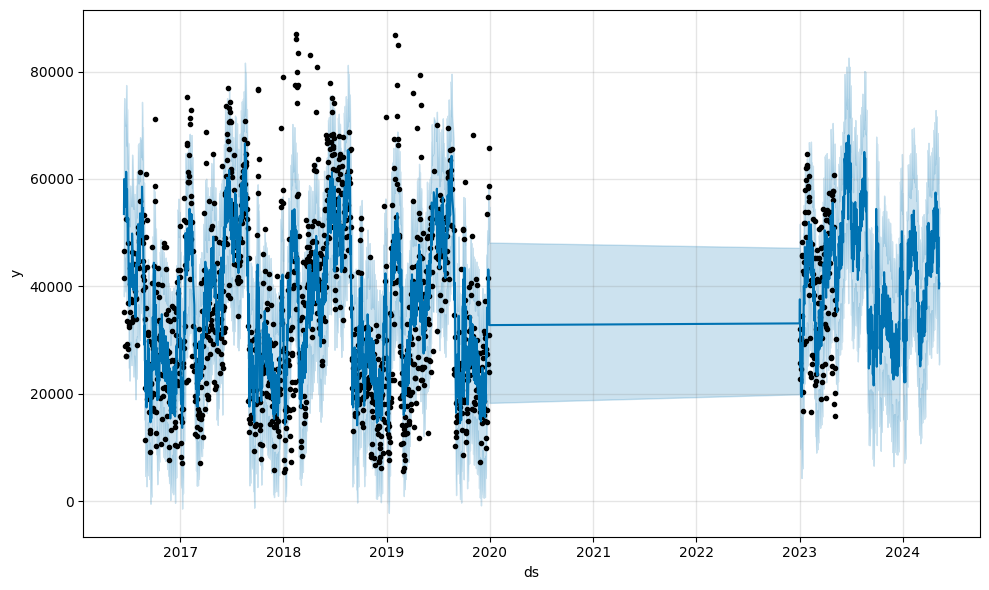

In [19]:
from holiday import holidays
allholidays = holidays() # pd.concat((holidays(), badweathers))
m = Prophet(holidays = allholidays, yearly_seasonality = 20, weekly_seasonality = 10)
m.add_country_holidays(country_name='CN')
m.fit(data)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

In [20]:
# from neuralprophet import NeuralProphet
# from sklearn.metrics import mean_squared_error
 
# # plotting
# import matplotlib.pyplot as plt
# nprophet_model = NeuralProphet()

# m = nprophet_model.fit(data, freq="D")
# forecast = m.predict(data)
# m.plot(forecast)
# preds_df_2 = nprophet_model.predict(future_df)
# nprophet_model.plot(preds_df_2)

In [21]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.to_csv('forecast.csv')

In [22]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()


INFO:prophet:Making 3 forecasts with cutoffs between 2018-07-04 00:00:00 and 2022-05-10 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.734
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1099.14   0.000145035       58.6641           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       1099.21   0.000252859       69.8578   3.744e-06       0.001      201  LS failed, Hessian reset 
     199       1099.27   0.000187565       49.3161           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1099.29   5.49133e-05       88.4459      0.6266           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       1099.29   3.58222e-08       52.4399      0.7408      0.7408      460   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.7267
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1390.03   0.000107741       76.4865      0.5549      0.5549      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       1390.62    0.00213824       103.119   2.749e-05       0.001      262  LS failed, Hessian reset 
     199       1390.99   0.000440385       76.2421      0.3585           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260       1391.01   1.65412e-07        77.497   1.946e-09       0.001      397  LS failed, Hessian reset 
     262       1391.01   7.76619e-08       68.0038           1           1      399   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/py

Initial log joint probability = -41.6059
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1915.41   0.000102913       87.8061           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       1915.62    0.00164402       80.2723   3.898e-05       0.001      235  LS failed, Hessian reset 
     199       1915.79   1.40451e-05       66.2103      0.6673      0.6673      309   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216        1915.8   0.000114811       63.6943    1.42e-06       0.001      372  LS failed, Hessian reset 
     299       1915.83   3.02912e-05       61.4344      0.5269      0.5269      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       1915.85   0.000188652       65.8195   2.705e-06       0.001      537  LS failed, Hessian rese

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-07-05,54851.116674,40304.968601,69101.675142,43200,2018-07-04
1,2018-07-06,61057.511720,46203.550322,75656.377149,42000,2018-07-04
2,2018-07-07,58935.528332,44812.615939,73648.974485,61600,2018-07-04
3,2018-07-08,51840.669411,36041.954266,66157.901064,53800,2018-07-04
4,2018-07-09,56746.690294,42281.442399,70607.232860,56200,2018-07-04


/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


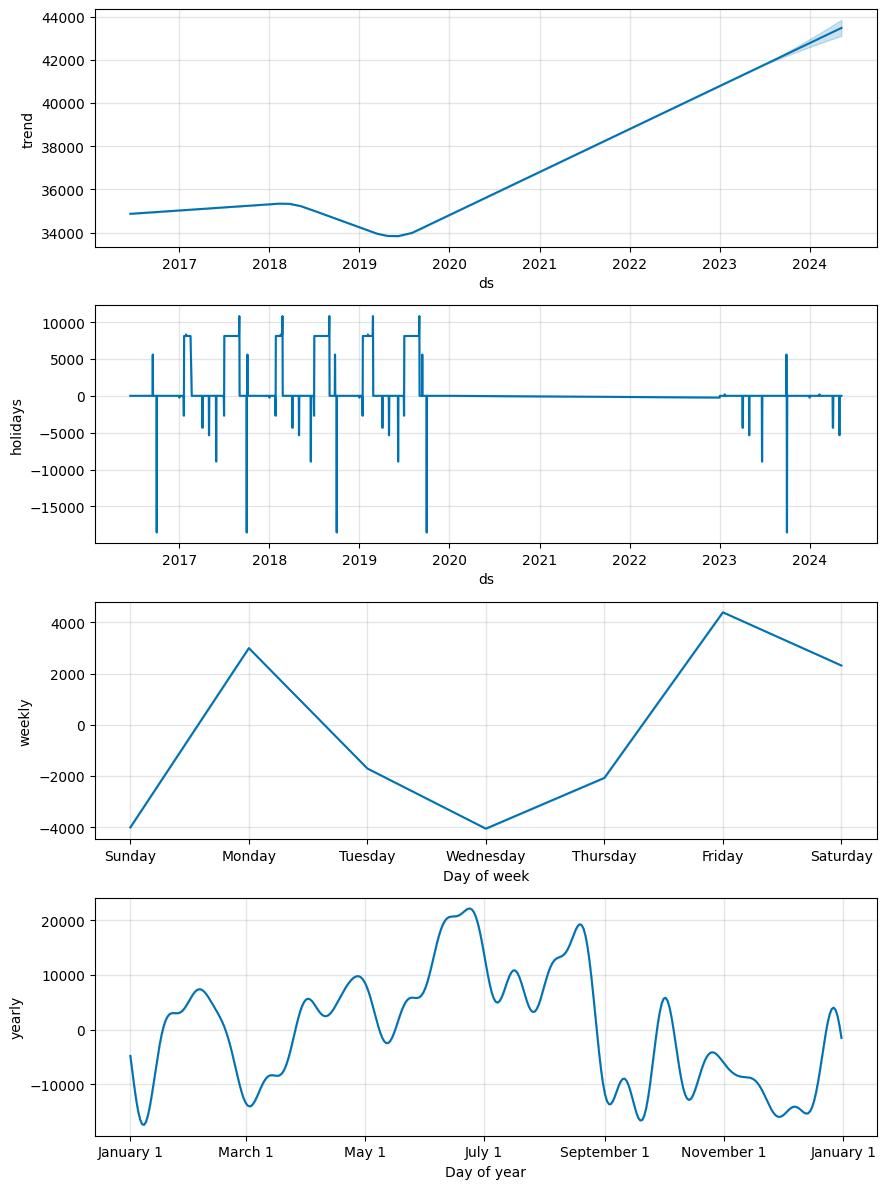

In [23]:
fig2 = m.plot_components(forecast)

In [24]:
# from holidays import country_holidays

# us_holidays = country_holidays('CN', years=2017)

# for day in us_holidays.items():
#     print(day)

# pd.date_range(start='2018-08-08', end = '2018-08-15', freq='D')
# pd.to_datetime(['2018-08-08'])
